### 导入库

In [1]:
import tensorflow as tf
import os,shutil
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.optimizers import SGD, RMSprop, Adam
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

Using TensorFlow backend.


### 查看数据集

In [6]:
base_dir = './'
train1_dir = os.path.join(base_dir, 'train1')
print('tatal training machine images:', len(os.listdir(train1_dir)))
validation1_dir = os.path.join(base_dir, 'validation1')
print('tatal validation machine images:', len(os.listdir(validation1_dir)))
test1_dir = os.path.join(base_dir, 'test1')
print('tatal testing machine images:', len(os.listdir(test1_dir)))

train_on_dir = os.path.join(base_dir, 'on')
#print('tatal on machine images:', len(os.listdir(train_on_dir)))
train_off_dir = os.path.join(base_dir, 'off')
#print('tatal off machine images:', len(os.listdir(train_off_dir)))

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
train_on_dir = os.path.join(base_dir, 'train/on')
train_off_dir = os.path.join(base_dir, 'train/off')

tatal training machine images: 219
tatal validation machine images: 74
tatal testing machine images: 73


### 构建卷及神经网络

In [8]:
model = Sequential()

model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(227, 227, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation=('relu')))
model.add(Dense(2, activation=('sigmoid')))

sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
adam= Adam(lr=0.01)

### 每一层的参数

In [9]:
#特征图维度随每层的变化
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 223, 223, 32)      2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 54, 54, 128)       8320      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 27, 27, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 93312)             0         
__________

### 数据增强生成器

In [10]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

In [11]:
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
fnames = [os.path.join(train_on_dir, fname) for
         fname in os.listdir(train_on_dir)]
img_path = fnames[3]

img = image.load_img(img_path, target_size=(227,227))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

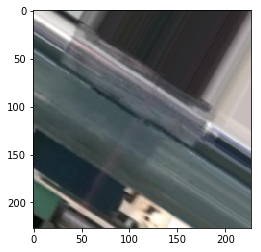

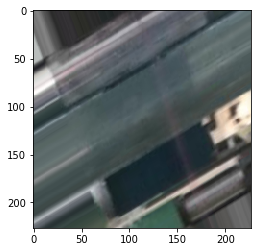

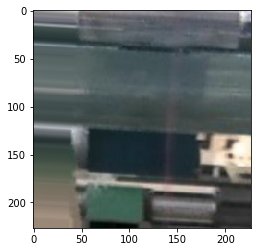

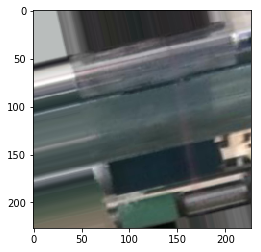

In [13]:
i = 0
for batch in train_datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
        
plt.show()

In [14]:
#训练模型
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(227,227),
        batch_size=32)

Found 219 images belonging to 2 classes.


In [15]:
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(227,227),
        batch_size=32)

Found 74 images belonging to 2 classes.


In [11]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])#categorical_crossentropy
#返回一个history对象，字典里包含训练过程中的所有数据
history = model.fit_generator(
      train_generator,
      steps_per_epoch=10,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=32)

Epoch 1/100
10/10 [==============================] - 8s 786ms/step - loss: 1.2057 - acc: 0.4426 - val_loss: 0.6927 - val_acc: 0.5000
Epoch 2/100
10/10 [==============================] - 6s 550ms/step - loss: 0.6928 - acc: 0.4879 - val_loss: 0.6916 - val_acc: 0.5000
Epoch 3/100
10/10 [==============================] - 5s 537ms/step - loss: 0.6908 - acc: 0.5170 - val_loss: 0.6883 - val_acc: 0.5250
Epoch 4/100
10/10 [==============================] - 5s 527ms/step - loss: 0.6897 - acc: 0.5257 - val_loss: 0.6808 - val_acc: 0.5000
Epoch 5/100
10/10 [==============================] - 6s 575ms/step - loss: 0.6850 - acc: 0.5001 - val_loss: 0.6632 - val_acc: 0.5250
Epoch 6/100
10/10 [==============================] - 5s 544ms/step - loss: 0.6851 - acc: 0.5461 - val_loss: 0.6744 - val_acc: 0.6750
Epoch 7/100
10/10 [==============================] - 6s 561ms/step - loss: 0.6811 - acc: 0.5644 - val_loss: 0.6496 - val_acc: 0.8250
Epoch 8/100
10/10 [==============================] - 5s 531ms/step - 

In [12]:
#保存模型
model.save('./on_and_off1.h5', overwrite=True)

In [13]:
#在测试集上评估这个模型
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(227,227),
        batch_size=32,)

test_loss, test_acc = model.evaluate_generator(test_generator, steps=500)
print('test acc:',  test_acc)

Found 73 images belonging to 2 classes.
test acc: 0.9179116735814965


### 绘制结果

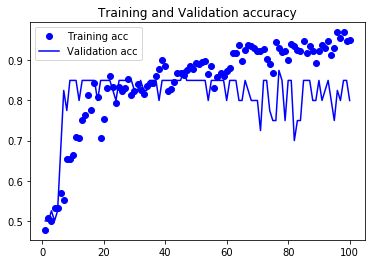

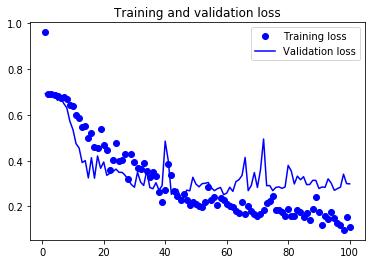

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss , 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### 平滑曲线

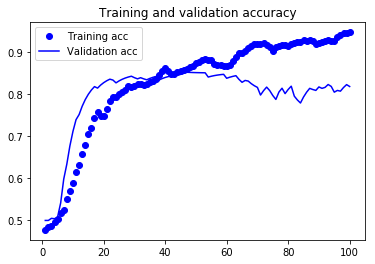

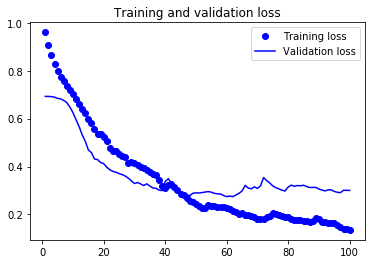

In [15]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()


plt.show()

In [16]:
from keras.models import load_model
model = load_model('./on_and_off1.h5')
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])#categorical_crossentropy
#返回一个history对象，字典里包含训练过程中的所有数据
history = model.fit_generator(
      train_generator,
      steps_per_epoch=10,
      epochs=300,
      validation_data=validation_generator,
      validation_steps=32)

Epoch 1/300
10/10 [==============================] - 6s 580ms/step - loss: 0.5239 - acc: 0.8822 - val_loss: 0.2473 - val_acc: 0.8000
Epoch 2/300
10/10 [==============================] - 5s 493ms/step - loss: 1.0985 - acc: 0.7750 - val_loss: 0.3190 - val_acc: 0.8500
Epoch 3/300
10/10 [==============================] - 5s 504ms/step - loss: 2.0788 - acc: 0.7155 - val_loss: 0.3476 - val_acc: 0.8500
Epoch 4/300
10/10 [==============================] - 5s 504ms/step - loss: 0.6197 - acc: 0.7547 - val_loss: 0.2807 - val_acc: 0.8500
Epoch 5/300
10/10 [==============================] - 5s 513ms/step - loss: 0.2249 - acc: 0.9003 - val_loss: 0.2697 - val_acc: 0.8500
Epoch 6/300
10/10 [==============================] - 5s 502ms/step - loss: 0.3494 - acc: 0.8349 - val_loss: 0.2825 - val_acc: 0.8000
Epoch 7/300
10/10 [==============================] - 5s 497ms/step - loss: 0.4521 - acc: 0.8028 - val_loss: 0.2807 - val_acc: 0.8500
Epoch 8/300
10/10 [==============================] - 5s 499ms/step - 

In [17]:
model.save('./on_and_off2.h5', overwrite=True)

In [18]:
test1_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(227,227),
        batch_size=32,)

test_loss, test_acc = model.evaluate_generator(test1_generator, steps=32)
print('test acc:',  test_acc)

Found 73 images belonging to 2 classes.
test acc: 0.9722921916609747


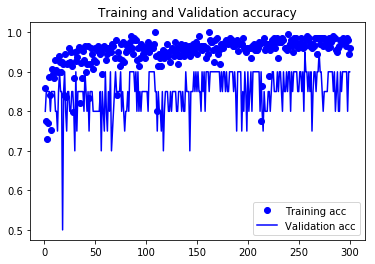

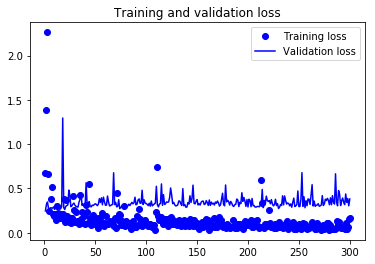

In [19]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss , 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

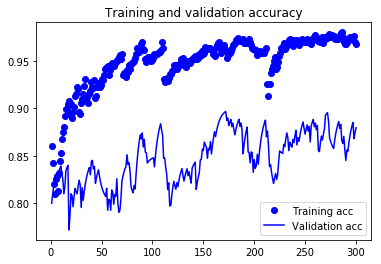

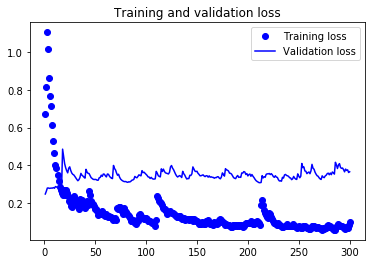

In [20]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()


plt.show()